### Ejemplo de covarianza

**Formula:**
$$ COV(X,Y) = \frac{\sum^{n}_{i=1} (x_{i} - \hat{x})(y_{i} - \hat{y})}{n-1} $$

- La covarianza es como un "promedio de áreas".
- Qué tan lejos está un punto cualquiera del punto promedio?
- Si definimos cuadrantes respecto a las líneas promedios, los cuadrantes se numeran empezando desde el cuadrante superior derecho y se prosigue en el sentido contrareloj.
- Si un punto se encuentra en los cuadrantes I o III tiene covarianza positiva.
- Si un punto se encuentra en los cuadrantes II o IV tiene covarianza negativa.
- La covarianza nos dice solo si la pendiente de la recta de mejor ajuste es positiva, negativa o neutra.
- Sirve para calcular la correlación.

### Importamos librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import count

### Creamos un dataset de ejemplo

In [2]:
df = pd.DataFrame(data = {'x': [1, 2, 3, 4, 5, 6, 7, 8],
                          'y': [1.5, 1.8, 3.2, 4.5, 5.7, 6, 6.8, 7.6]} )
x_mean = df["x"].mean() # promedio variable x
y_mean = df["y"].mean() # promedio variable y

df.head()

,x,y
0,1,1.5
1,2,1.8
2,3,3.2
3,4,4.5
4,5,5.7


### Función para pintar un cuadrado de covarianza

In [10]:
def add_square_to_point(i):
    """
    Adds a covariance square for i with index i
    """
    x_i = df.iloc[i,0] # coordenada x del punto i
    y_i = df.iloc[i,1] # coordenada x del punto i
    x_diff = x_i - x_mean # diferencia en eje x respecto al promedio
    y_diff = y_i - y_mean # diferencia en eje y respecto al promedio

    ### Pintamos un rectangulo de covarianza
    rect = patches.Rectangle((x_i, y_i), -x_diff, -y_diff,
                             linewidth=1,
                             edgecolor='b',
                             facecolor='b',
                             fill=False,
                             hatch=".")
    ax.add_patch(rect)

### Gráfica de covarianza

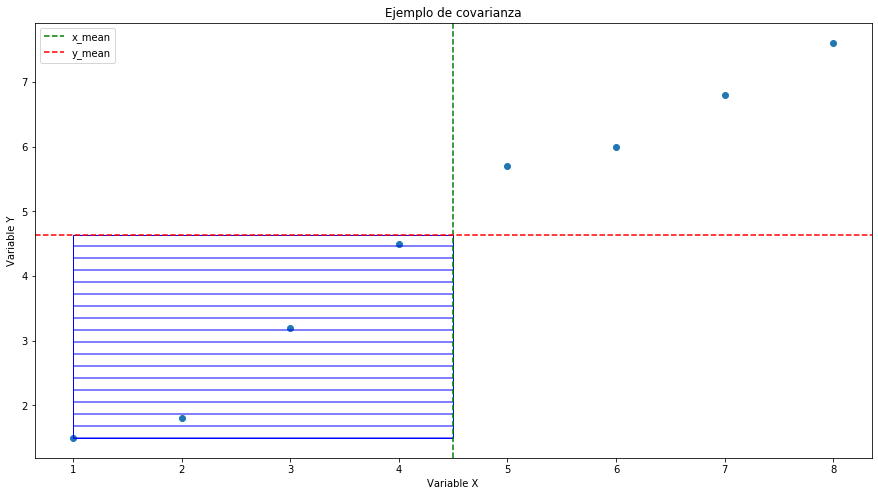

In [4]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(15, 8))


plt.scatter(x = df["x"], y = df["y"]) # scatter plot
plt.axvline(x=x_mean, color='g', linestyle='--', label = "x_mean") # vertical dashed line
plt.axhline(y=y_mean, color='r', linestyle='--', label = "y_mean") # horizontal dashed line 

add_square_to_point(0)

plt.title('Ejemplo de covarianza')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()

In [5]:
df = pd.DataFrame(data = {'x': [1, 2, 3, 4, 5, 6, 7, 8],
                          'y': [-1.5, -1.8, -3.2, -4.5, -5.7, -6, -6.8, -7.6]} )
x_mean = df["x"].mean()
y_mean = df["y"].mean()

df.head()

,x,y
0,1,-1.5
1,2,-1.8
2,3,-3.2
3,4,-4.5
4,5,-5.7


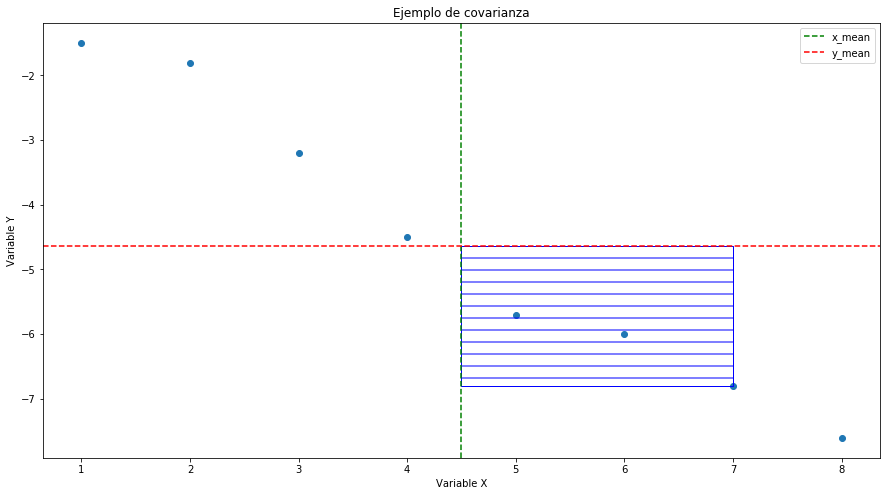

In [6]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(15, 8))


plt.scatter(x = df["x"], y = df["y"]) # scatter plot
plt.axvline(x=x_mean, color='g', linestyle='--', label = "x_mean") # vertical dashed line
plt.axhline(y=y_mean, color='r', linestyle='--', label = "y_mean") # horizontal dashed line 

add_square_to_point(6)

plt.title('Ejemplo de covarianza')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()

### Habilitar animaciones en Jupyter

In [7]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


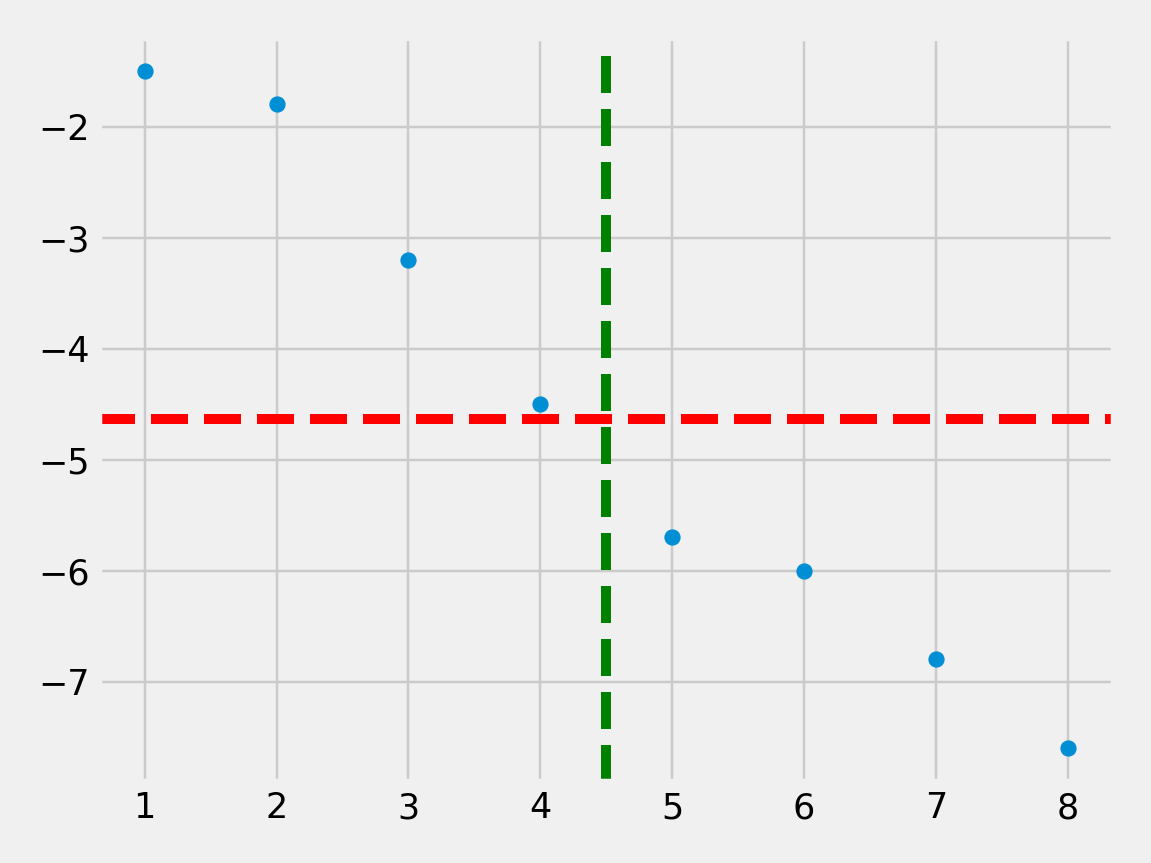

In [11]:
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')
num_points = len(df)
fig, ax = plt.subplots()

def animate(i):

    x = df['x'][0:i]
    y = df['y'][0:i]
    
    plt.cla()

    plt.scatter(x, y)
    
    if i >= num_points:
        plt.axvline(x=x_mean, color='g', linestyle='--', label = "x_mean") # vertical dashed line
        plt.axhline(y=y_mean, color='r', linestyle='--', label = "y_mean") # horizontal dashed line
        add_square_to_point(i-num_points)
    
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.xlabel("X variable")
    plt.ylabel("Y variable")
    i=+1


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()